## Abstract

### Olist Marketing Funnel: Customer Segmentation, RFM Modeling, Persuasion Modeling, Targeted Recommendations with controlled A/B Testing, Social Media Analytics

A Data Driven Algorithmic Marketing system for brazil’s biggest online marketplace, to segment customers, to do Cohort Analysis, RFM Modeling, Uplift Modeling, Identify Upselling and Cross Selling opportunities using Targeted Recommendations, Context Aware Recommendation using product Features, Pricing Optimization. 

### Brazilian E-commerce Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist. The dataset has information of 100k orders from 2016 to 2018 made in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. It also has a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

In [16]:
#importing all the required libraries
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

np.random.seed(42)
from datetime import datetime, timedelta
%matplotlib inline

In [17]:
Olist_db = pd.read_csv('Olist_Master.csv')

In [18]:
Olist_db.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_estimated_delivery_date',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_unique_id', 'review_response_time', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_dayofweek',
       'order_purchase_hour', 'order_purchase_day', 'order_purchase_mon'],
      dtype='object')

### Product Recommendation Based on Popularity by Month for New Customers

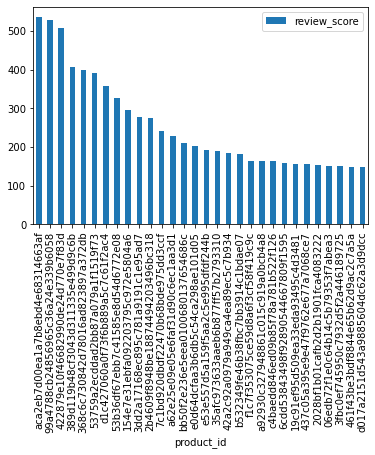

In [19]:
popular_products = pd.DataFrame(Olist_db.groupby('product_id')['review_score'].count())
popular_products = popular_products.sort_values('review_score', ascending=False)
popular_products.head(30).plot(kind = "bar")

In [20]:
# converting date columns to datetime
date_columns = ['review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp']
for col in date_columns:
    Olist_db[col] = pd.to_datetime(Olist_db[col], format='%Y-%m-%d %H:%M:%S')

In [21]:
# This will show popular products for the current month and even state 
currentMonth = datetime.now().month
Olist_db['rating_month'] = Olist_db.review_answer_timestamp.apply(lambda x: x.month)

In [22]:
#sales_per_category = Olist_db.groupby(['order_purchase_mon', 'product_category_name'], as_index=False).payment_value.sum()

temp = Olist_db[Olist_db.rating_month == currentMonth]


popular_products = pd.DataFrame(temp.groupby(['rating_month', 'product_category_name'], as_index=False).agg({'review_score': ['count', 'mean']}))
popular_products.columns = ['Rating Month','Product Category', 'Popularity', 'Average Review Ratings']
popular_products = popular_products.sort_values('Popularity', ascending=False)
popular_products

,Rating Month,Product Category,Popularity,Average Review Ratings
6,10,Bed Bath Table,603,3.830846
59,10,Sports Leisure,541,4.216266
38,10,Health Beauty,415,4.269880
35,10,Furniture Decor,405,3.886420
63,10,Toys,394,4.195431
...,...,...,...,...
11,10,Cine Photo,1,5.000000
58,10,Small Appliances Home Oven And Coffee,1,1.000000
8,10,Books Imported,1,5.000000
26,10,Fashion Childrens Clothes,1,5.000000


In [23]:
import plotly.express as px
popular_products = popular_products[:20]
fig = px.bar(popular_products, x='Product Category', y='Popularity',
             hover_data=['Average Review Ratings'], color='Average Review Ratings',
             height=500)
fig.show()

### Product Recommendation Based on Highly Rated Categories

In [24]:
# creating an aggregation
avg_score_per_category = Olist_db.groupby('product_category_name', as_index=False).agg({'review_score': ['count', 'mean']})
avg_score_per_category.columns = ['Product Category', 'Number of Reviews', 'Average Review Ratings']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['Number of Reviews'] > 500]
avg_score_per_category = avg_score_per_category.sort_values(by='Average Review Ratings', ascending=False)
avg_score_per_category

,Product Category,Number of Reviews,Average Review Ratings
8,Books General Interest,565,4.431858
53,Luggage Accessories,1163,4.290628
60,Pet Shop,2030,4.188670
66,Stationery,2625,4.176381
44,Home Appliances,826,4.163438
36,Food,526,4.157795
69,Toys,4281,4.142490
56,Musical Instruments,719,4.137691
63,Small Appliances,705,4.131915
20,Cool Stuff,3999,4.125781


In [25]:
import plotly.express as px
avg_ratings = avg_score_per_category[:20]
fig = px.bar(avg_ratings, x='Product Category', y='Number of Reviews',
             hover_data=['Average Review Ratings'], color='Average Review Ratings',
             height=500)
fig.show()

### Geo Plot of Ratings by State

In [26]:
Olist_db.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_estimated_delivery_date',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_unique_id', 'review_response_time', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_dayofweek',
       'order_purchase_hour', 'order_purchase_day', 'order_purchase_mon',
       'rating_month'],
      dtype='object')

In [27]:
geolocation_db = pd.read_csv('olist_geolocation_dataset.csv')

In [28]:
geolocation_db.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [29]:
#Removing some outliers
geolocation_db = geolocation_db[geolocation_db.geolocation_lat <= 5.27438888]
geolocation_db = geolocation_db[geolocation_db.geolocation_lng >= -73.98283055]
geolocation_db = geolocation_db[geolocation_db.geolocation_lat >= -33.75116944]
geolocation_db = geolocation_db[geolocation_db.geolocation_lng <=  -34.79314722]

In [30]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(geolocation_db.geolocation_lng, geolocation_db.geolocation_lat)
geolocation_db['x'] = pd.Series(x)
geolocation_db['y'] = pd.Series(y)

In [31]:
# transforming the prefixes to int for plotting purposes
geolocation_db['geolocation_zip_code_prefix'] = geolocation_db['geolocation_zip_code_prefix'].astype(int)

In [32]:
brazil = geolocation_db
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

,geolocation_zip_code_prefix
count,1.000121e+06
mean,3.657332e+04
std,3.054939e+04
min,1.001000e+03
25%,1.107500e+04
50%,2.653000e+04
75%,6.350400e+04
max,9.999000e+04
